In [436]:
import matplotlib.pyplot as plt
import numpy as np

In [437]:
np.set_printoptions(precision=8)

### $\beta$-scaling (but the original estimator)

In [438]:
data = np.loadtxt("/Users/ecasiano/Xcode/pimc/pimc/Big/2D_32_1024_20_16.666667_1.000000_4.000000_1000_SWAP_42.dat")
# data = np.loadtxt("/Users/ecasiano/Xcode/pimc/pimc/Big/2D_32_1024_20_16.666667_1.000000_4.000000_10000_1000_SWAP_42_strip.dat")
np.shape(data)
data[:4]
data.shape[0]

1000

In [439]:
P = np.sum(data,axis=0)

In [440]:
pj = np.zeros(data.shape)

In [441]:
for i in range(data.shape[1]):
    pj[:,i]=P[i]

In [442]:
N_rows = data.shape[0]
pj_bar = (pj-data)/(N_rows-1)

In [443]:
D = 2
# L = 32
l_max = 20
m_max = l_max**D # square
# m_max = l_max*L # strip
S = np.zeros(m_max+1)
S_err = np.zeros(m_max+1)
for m in range(m_max+1):
    S_jacknifed = -np.log(pj_bar[:,m]/pj_bar[:,0])
    S[m] = np.mean(S_jacknifed)
    S_err[m] = np.sqrt(N_rows-1)*np.std(S_jacknifed)
S_square = S
S_err_square = S_err

### Strip geometry

In [444]:
# data = np.loadtxt("/Users/ecasiano/Xcode/pimc/pimc/Big/2D_32_1024_20_16.666667_1.000000_4.000000_1000_SWAP_42.dat")
data = np.loadtxt("/Users/ecasiano/Xcode/pimc/pimc/Big/2D_32_1024_20_16.666667_1.000000_4.000000_10000_1000_SWAP_42_strip.dat")
np.shape(data)
data[:4]
data.shape[0]

912

In [445]:
P = np.sum(data,axis=0)
pj = np.zeros(data.shape)
for i in range(data.shape[1]):
    pj[:,i]=P[i]
N_rows = data.shape[0]
pj_bar = (pj-data)/(N_rows-1)

In [446]:
D = 2
L = 32
l_max = 20
# m_max = l_max**D # square
m_max = l_max*L # strip
S = np.zeros(m_max+1)
S_err = np.zeros(m_max+1)
for m in range(m_max+1):
    S_jacknifed = -np.log(pj_bar[:,m]/pj_bar[:,0])
    S[m] = np.mean(S_jacknifed)
    S_err[m] = np.sqrt(N_rows-1)*np.std(S_jacknifed)
S_strip = S
S_err_strip = S_err

### Entanglement Boundary Law

In [447]:
x = np.arange(0,l_max+1,1).astype(int)
areas = (x*x).astype(int) # square
areas_strip = (L*x).astype(int) # strip
# areas = (x*L).astype(int) # strip
x,areas,areas_strip

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121, 144,
        169, 196, 225, 256, 289, 324, 361, 400]),
 array([  0,  32,  64,  96, 128, 160, 192, 224, 256, 288, 320, 352, 384,
        416, 448, 480, 512, 544, 576, 608, 640]))

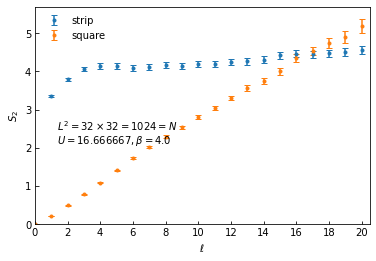

In [448]:
fig,ax1 = plt.subplots()
ax1.errorbar(x, S_strip[areas_strip], yerr=S_err_strip[areas_strip], fmt='.', capsize=3,label='strip');
ax1.errorbar(x, S_square[areas], yerr=S_err_square[areas], fmt='.', capsize=3,label='square');
# plt.errorbar(x.astype(int), S[boundary_sizes], yerr=S_err[boundary_sizes], fmt='.', capsize=3);
# ax1.plot(betas,S2s,color='lightskyblue')
ax1.set_ylabel(r'$S_2$')
ax1.set_xlabel(r'$\ell$')
# # ax1.axhline(K_exact,color='#cccccc',zorder=-10)
ax1.annotate(r"$L^2 =32 \times 32 = 1024 = N$",(0.15,0.50),xycoords='figure fraction')
# ax1.annotate(r"$\ell_{\rm{max}}=20$",(0.55,0.30),xycoords='figure fraction')
ax1.annotate(r"$U=16.666667,\beta=4.0$",(0.15,0.45),xycoords='figure fraction')
ax1.set_xlim(0,x[-1]+0.5)
ax1.set_ylim(0,S_square[-1]+0.5)
ax1.tick_params(direction='in')
plt.legend(frameon=False)

# # ax1.annotate(r'$K_{exact}=%.4f$'%(K_exact),(0.40,0.75),xycoords='figure fraction')
# ax1.annotate(r'$\langle K \rangle = %.4f \pm %.4f$'%(K_pimc,error),(0.40,0.70),xycoords='figure fraction')
# ax1.tick_params(axis='both',direction='in')
ax1.set_xticks(x[::2])
plt.savefig("boundary_law_scaling_stripANDsquare.pdf");

In [449]:
# for m,w in enumerate(x_indices):
#     print(f"S(m={m:02d}) = {S[w]:0.6f} +/- {S_err[w]:0.6f}")

### Same but for strip

In [435]:
# data = np.loadtxt("/Users/ecasiano/Xcode/pimc/pimc/Big/2D_32_1024_20_16.666667_1.000000_4.000000_1000_SWAP_42.dat")
data = np.loadtxt("/Users/ecasiano/Xcode/pimc/pimc/Big/2D_32_1024_20_16.666667_1.000000_4.000000_10000_1000_SWAP_42_strip.dat")
np.shape(data)
data[:4]
data.shape[0]

873

In [405]:
P = np.sum(data,axis=0)
pj = np.zeros(data.shape)
for i in range(data.shape[1]):
    pj[:,i]=P[i]

N_rows = data.shape[0]
pj_bar = (pj-data)/(N_rows-1)

In [406]:
D = 2
L = 32
l_max = 20
# m_max = l_max**D # square
m_max = l_max*L # strip
S = np.zeros(m_max+1)
S_err = np.zeros(m_max+1)
for m in range(m_max+1):
    S_jacknifed = -np.log(pj_bar[:,m]/pj_bar[:,0])
    S[m] = np.mean(S_jacknifed)
    S_err[m] = np.sqrt(N_rows-1)*np.std(S_jacknifed)

In [374]:
x = np.arange(0,l_max+1,1).astype(int)
# areas = (x*x).astype(int) # square
areas = (x*L).astype(int) # strip
x,areas

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 array([  0,  32,  64,  96, 128, 160, 192, 224, 256, 288, 320, 352, 384,
        416, 448, 480, 512, 544, 576, 608, 640]))

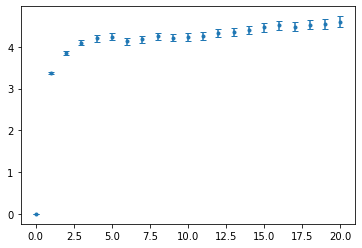

In [375]:
fig,ax2 = plt.subplots()
ax2.errorbar(x, S[areas], yerr=S_err[areas], fmt='.', capsize=3);